<a href="https://colab.research.google.com/github/Andremarcucci98/ImersaoDados3--Alura/blob/main/Imersao_Dados_Aula03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Imersão Dados - Aula 03***
*   Correlações, causalidade e relações entre genes

####Link do repositório GitHub com os dados utilizados durante a aula:
*   https://github.com/alura-cursos/imersaodados3/tree/main/dados

###***Developer:*** André Marcucci Maciel
###***GitHub:*** *https://github.com/Andremarcucci98*

In [ ]:
# Importando bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importando tabela do GitHub
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

#Carregando o conteúdo e descompactando utilizando "compression"
dados = pd.read_csv(url_dados, compression='zip')
dados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397

In [ ]:
dados.head()


In [ ]:
dados.shape

In [ ]:
dados['tratamento']

In [ ]:
dados['tratamento'].unique()

In [ ]:
dados['tempo'].unique()

In [ ]:
dados['dose'].unique()

In [ ]:
dados['droga'].unique()

In [ ]:
dados['g-0'].unique()

In [ ]:
dados['tratamento'].value_counts()

In [ ]:
dados['dose'].value_counts()

In [ ]:
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)

In [ ]:
dados.head()

In [ ]:
cod_compostos = dados['composto'].value_counts().index[:5]
cod_compostos

In [ ]:
dados.query('composto in @cod_compostos')

In [ ]:
sns.set()
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'composto', data=dados.query('composto in @cod_compostos'))
ax.set_title('Top 5 compostos')
plt.show()

In [ ]:
len(dados['g-0'].unique())

In [ ]:
dados['g-0'].min()

In [ ]:
dados['g-0'].max()

In [ ]:
dados['g-0'].hist(bins=100)

In [ ]:
dados['g-19'].hist(bins=100)

In [ ]:
dados['g-0'].mean()

In [ ]:
dados.describe()

In [ ]:
dados[{'g-0','g-1'}]

In [ ]:
dados.loc[:, 'g-0':'g-771'].describe()

In [ ]:
dados.loc[:, 'g-0':'g-771'].describe().T['mean'].hist(bins=30)

In [ ]:
dados.loc[:, 'g-0':'g-771'].describe().T['min'].hist(bins=30)

In [ ]:
dados.loc[:, 'g-0':'g-771'].describe().T['max'].hist(bins=30)

In [ ]:
dados.loc[:, 'c-0':'c-99'].describe().T['mean'].hist(bins=50)

In [ ]:
plt.figure(figsize=[10,8])
sns.boxplot(x='g-0', y='tratamento' , data=dados)

In [ ]:
dados['tratamento'].value_counts(normalize=True)

In [ ]:
dados['dose'].value_counts(normalize=True)

In [ ]:
dados['tratamento'].value_counts().plot.pie()

In [ ]:
dados['tempo'].value_counts().plot.pie()

In [ ]:
dados['tempo'].value_counts().plot.bar()

In [ ]:
dados_filtrados = dados[dados['g-0'] > 0]
dados_filtrados.head()

###**Aula 03** - Correlações, causalidade e relações entre genes

In [ ]:
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [ ]:
pd.crosstab(dados['dose'], dados['tempo'])
# Retorna quantidade de doses x tempo

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'],aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

Queremos saber a média do G-0 para quando recebemos uma dose de pequena quantidade, medimos a saída depois de 24h e queremos a média "com_controle" e "com_droga".
A primeira linha nos informa que a amostra "D1" "com_controle" obteve média de -0.251760, já "com_droga" obteve média de 0.367996.

In [ ]:
dados[['g-0','g-3']]

,g-0,g-3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919
...,...,...
23809,0.1394,-0.5080
23810,-1.3260,0.9905
23811,0.3942,-0.7389
23812,0.6660,0.2044


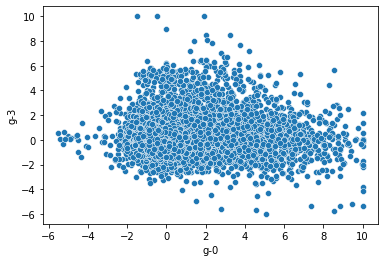

In [ ]:
sns.scatterplot(x='g-0', y='g-3', data=dados)

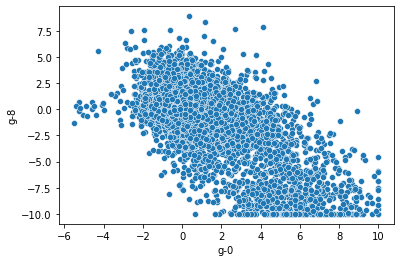

In [ ]:
sns.scatterplot(x='g-0', y='g-8', data=dados)

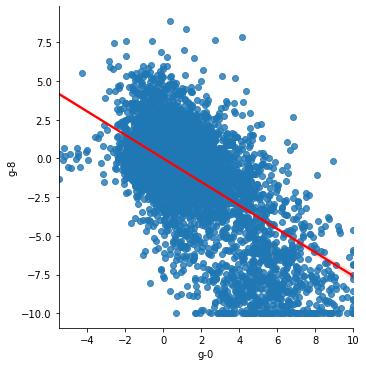

In [ ]:
sns.lmplot(data=dados, x='g-0', y='g-8', line_kws={'color':'red'})

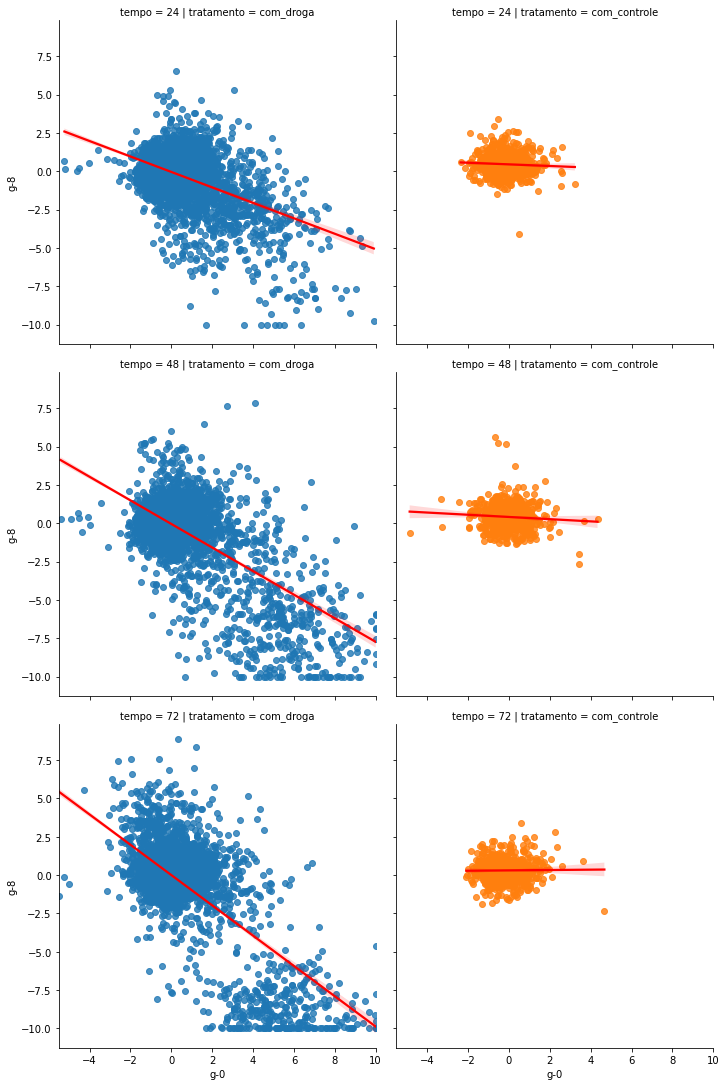

In [ ]:
# Correlação entre g-0 e g-8, separando por tempo e tipo de tratamento
sns.lmplot(data=dados, x='g-0', y='g-8', line_kws={'color':'red'}, col='tratamento', row='tempo', hue='tratamento')

In [ ]:
dados.loc[:,'g-0':'g-771'].corr()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,0.365095,-0.528006,0.295970,0.067108,-0.250243,-0.110665,-0.214344,-0.280492,-0.036098,-0.128288,-0.498922,-0.469595,0.673664,0.538050,0.297528,0.066530,0.240252,-0.170949,0.485924,-0.093815,0.397476,0.017923,0.321260,-0.131709,-0.133430,0.178220,0.201902,-0.205648,-0.676835,-0.433554,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.015556,-0.017184,0.043104,-0.189662,-0.050194,-0.007878,-0.083539,-0.042175,0.014307,-0.134166,-0.026985,0.088382,-0.077453,0.015545,-0.027527,-0.071078,-0.095445,0.049612,-0.040518,-0.074277,-0.022356,0.125763,-0.082779,0.020292,-0.023171,-0.207192,-0.066570,-0.057007,0.002062,0.029795,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,0.089525,-0.140916,0.008587,0.042106,-0.018846,-0.008093,-0.074404,-0.080120,-0.020085,-0.028099,-0.098775,-0.113000,0.175916,0.119166,0.071051,0.025358,0.078971,-0.086326,0.149456,0.033432,0.124239,-0.006327,0.120148,-0.041162,-0.030040,0.048549,0.096369,0.000494,-0.172627,-0.130200,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,0.039519,0.000851,0.011655,-0.116724,0.304819,-0.087159,-0.134135,-0.031211,0.174116,0.060289,-0.119276,-0.140391,0.110547,0.145925,0.155011,0.049182,-0.007754,-0.128488,0.078139,0.012422,0.040728,0.164467,0.171886,-0.069777,0.066560,0.102111,-0.036922,0.111994,-0.133740,-0.226928,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,0.215930,-0.292602,-0.008241,-0.005070,-0.284391,-0.116918,-0.252399,-0.250280,0

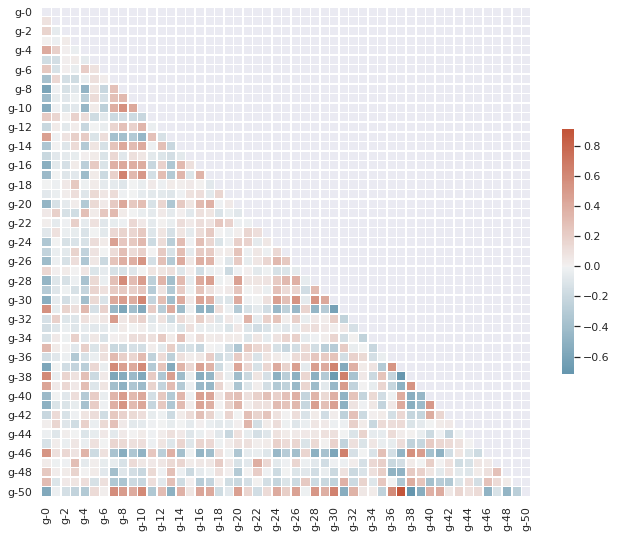

In [ ]:
import numpy as np

corr = dados.loc[:,'g-0':'g-50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
corr_celular = dados.loc[:,'c-0':'c-50'].corr()

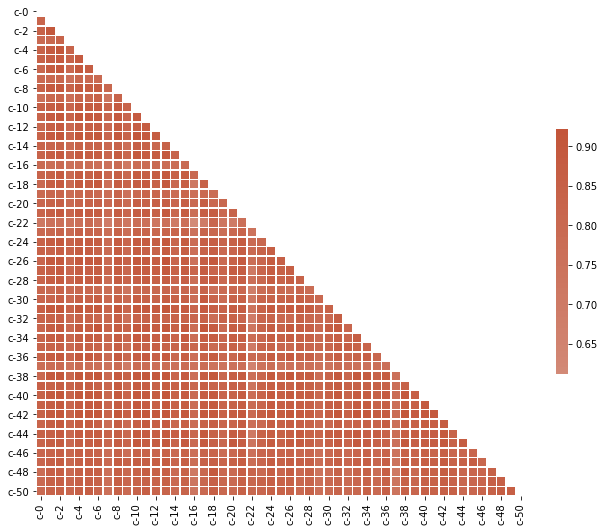

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##**Desafios - Aula 03** 


In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


###**Desafio 01:** Criar tabelas de frequência com pandas.groupby().

In [ ]:
dados.groupby(['dose', 'tratamento', 'tempo',]).mean()[['g-0','g-1','g-2']]

g-0       g-1       g-2
dose tratamento   tempo                              
D1   com_controle 24    -0.251760 -0.453322  0.246235
                  48    -0.122773 -0.453638  0.067312
                  72    -0.295271 -0.669059 -0.051885
     com_droga    24     0.367996 -0.170839  0.391348
                  48     0.412469 -0.142581  0.258459
                  72     0.286250 -0.127878  0.146559
D2   com_controle 24     0.010754 -0.229451  0.236691
                  48     0.013174  0.001737 -0.254331
                  72     0.070250  0.133537 -0.478629
     com_droga    24     0.115253 -0.081764  0.374927
                  48     0.214480 -0.001143  0.025528
                  72     0.253439  0.052840 -0.197125

Na tabela acima, buscamos obter uma relação entre as colunas 'tratamento', 'tempo' ,'dose' e as três primeiras amostras de genes, tendo como resultado uma média.

In [ ]:
#pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize='index')
dados.groupby(by= ['tratamento', 'tempo'])['dose'].value_counts(normalize=True).unstack()

dose                      D1        D2
tratamento   tempo                    
com_controle 24     0.496700  0.503300
             48     0.529321  0.470679
             72     0.501634  0.498366
com_droga    24     0.500279  0.499721
             48     0.527624  0.472376
             72     0.501393  0.498607

Exemplo de normalização por linha, seguindo códigos expostos em aula.

In [ ]:
dados.groupby(by= ['tratamento', 'tempo'])['dose'].value_counts(normalize=True)

tratamento    tempo  dose
com_controle  24     D2      0.503300
                     D1      0.496700
              48     D1      0.529321
                     D2      0.470679
              72     D1      0.501634
                     D2      0.498366
com_droga     24     D1      0.500279
                     D2      0.499721
              48     D1      0.527624
                     D2      0.472376
              72     D1      0.501393
                     D2      0.498607
Name: dose, dtype: float64

Mesmo tabela logo acima, mas fazendo normalização por coluna. Note que estamos fazendo um tipo de transposição que afeta apenas os resultados finais e os índice de 'doses'.

###**Desafio 02:** Normalizar o crosstab pela coluna.

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

###**Desafio 03:** Explorar outros agregadores

**aggfunc ->** If list of functions passed, the resulting pivot table will have hierarchical columns whose top level are the function names (inferred from the function objects themselves) If dict is passed, the key is column to aggregate and value is function or list of functions.

**margins ->** Add all row / columns (e.g. for subtotal / grand totals).

**margins_name ->** Name of the row / column that will contain the totals when margins is True.

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='min')

tratamento  com_controle  com_droga
dose tempo                         
D1   24           -2.370     -5.183
     48           -3.276     -5.420
     72           -2.086     -5.261
D2   24           -2.135     -5.233
     48           -4.859     -4.567
     72           -1.909     -5.513

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='max')

tratamento  com_controle  com_droga
dose tempo                         
D1   24            3.226      9.908
     48            3.423     10.000
     72            2.584      9.355
D2   24            2.601      7.167
     48            4.335     10.000
     72            4.670     10.000

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc=sum, margins=True, margins_name='Total')

tratamento   com_controle  com_droga      Total
dose  tempo                                    
D1    24         -75.7799  1319.2648  1243.4849
      48         -42.1113  1654.4150  1612.3037
      72         -90.6483  1030.5010   939.8527
D2    24           3.2800   412.7202   416.0002
      48           4.0180   770.1980   774.2160
      72          21.4262   907.3112   928.7374
Total           -179.8153  6094.4102  5914.5949

**Anotações de Códigos da comunidade do discord que gostei**

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
squarify.plot(sizes = dados.groupby(['tratamento','dose','tempo']).count()['id'],
              label=['Controle-D124',
                     'Controle-D148',
                     'Controle-D172',
                     'Controle-D224',
                     'Controle-D248',
                     'Controle-D272',
                     'Composto-D124',
                     'Composto-D148',
                     'Composto-D172',
                     'Composto-D224',
                     'Composto-D248',
                     'Composto-D272',
                     ],
              color=['deeppink','royalblue','lime',
                     'magenta', 'yellow', 'brown', 
                     'red', 'plum', 'lightslategrey',
                     'aquamarine', 'orangered', 'yellowgreen'], 
              alpha=.8,
              value=round(dados.groupby(['tratamento','dose','tempo']).count()['id']/sum(dados.groupby(['tratamento','dose','tempo']).count()['id']),3))
plt.title('Treemap dos dados agrupados por dose, tratamento e intervalo de tempo | T-DDHH | T=Tipo; DD=Dose; HH=Horário', size=18)
plt.axis('off')
plt.show()

###**Desafio 04:** Explorar o melt.

Link pandas.melt: https://pandas.pydata.org/docs/reference/api/pandas.melt.html
A função pd.melt() é útil para transformar um DataFrame em um formato onde uma ou mais colunas são variáveis identificadoras (id_vars), enquanto todas as outras colunas, consideradas variáveis medidas (value_vars), são "unpivoted" para o eixo da linha, restando apenas duas colunas não identificadoras, 'variable' e 'value'. 

In [ ]:
pd.melt(dados, id_vars=['tratamento', 'tempo', 'dose', 'droga'], value_vars='g-0')

,tratamento,tempo,dose,droga,variable,value
0,com_droga,24,D1,b68db1d53,g-0,1.0620
1,com_droga,72,D1,df89a8e5a,g-0,0.0743
2,com_droga,48,D1,18bb41b2c,g-0,0.6280
3,com_droga,48,D1,8c7f86626,g-0,-0.5138
4,com_droga,72,D2,7cbed3131,g-0,-0.3254
...,...,...,...,...,...,...
23809,com_droga,24,D2,df1d0a5a1,g-0,0.1394
23810,com_droga,24,D2,ecf3b6b74,g-0,-1.3260
23811,com_controle,48,D2,cacb2b860,g-0,0.3942
23812,com_droga,24,D1,8b87a7a83,g-0,0.6660


In [ ]:
pd.melt(dados, id_vars=['tratamento', 'dose', 'droga'], value_vars='g-1').head()

,tratamento,dose,droga,variable,value
0,com_droga,D1,b68db1d53,g-1,0.5577
1,com_droga,D1,df89a8e5a,g-1,0.4087
2,com_droga,D1,18bb41b2c,g-1,0.5817
3,com_droga,D1,8c7f86626,g-1,-0.2491
4,com_droga,D2,7cbed3131,g-1,-0.4009


###**Desafio 05:** Calcular e analisar a correlação entre os g's e c's. Refletir sobre os efeitos biológicos.

<Figure size 1440x576 with 0 Axes>

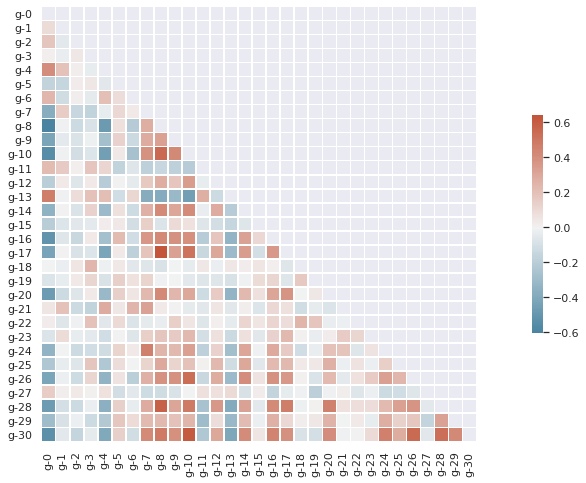

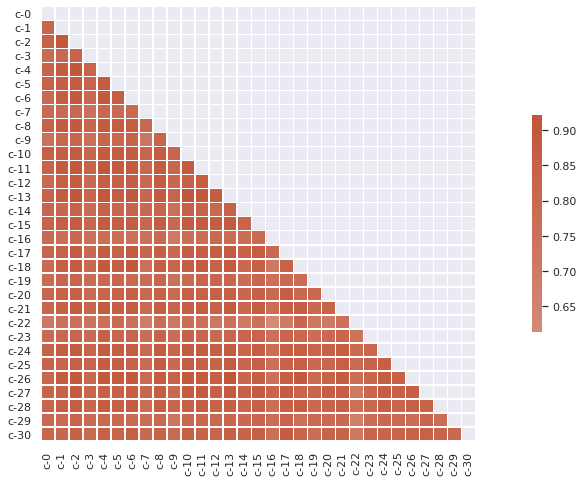

In [ ]:
sns.set()
plt.figure(figsize = (20,8))

corr_g = dados.loc[:,'g-0':'g-30'].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_g, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 8))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr_g, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

corr_c = dados.loc[:,'-0':'c-30'].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_c, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 8))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
ax =sns.heatmap(corr_c, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

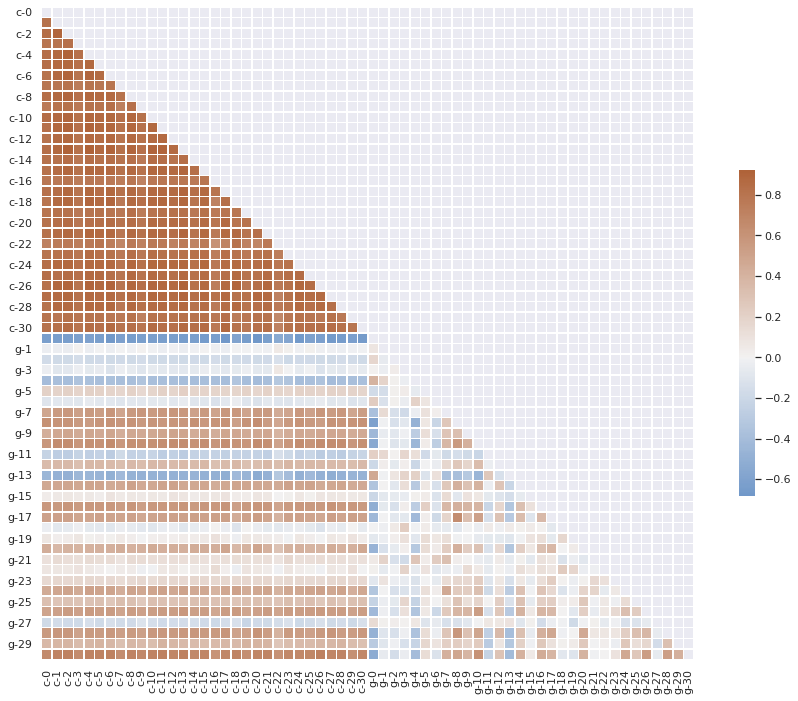

In [ ]:
corr_c = dados.loc[:,'c-0':'c-30']
corr_g = dados.loc[:,'g-0':'g-30']
concat_g_c = pd.concat([corr_c, corr_g], axis=1)
corr = concat_g_c.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 30, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

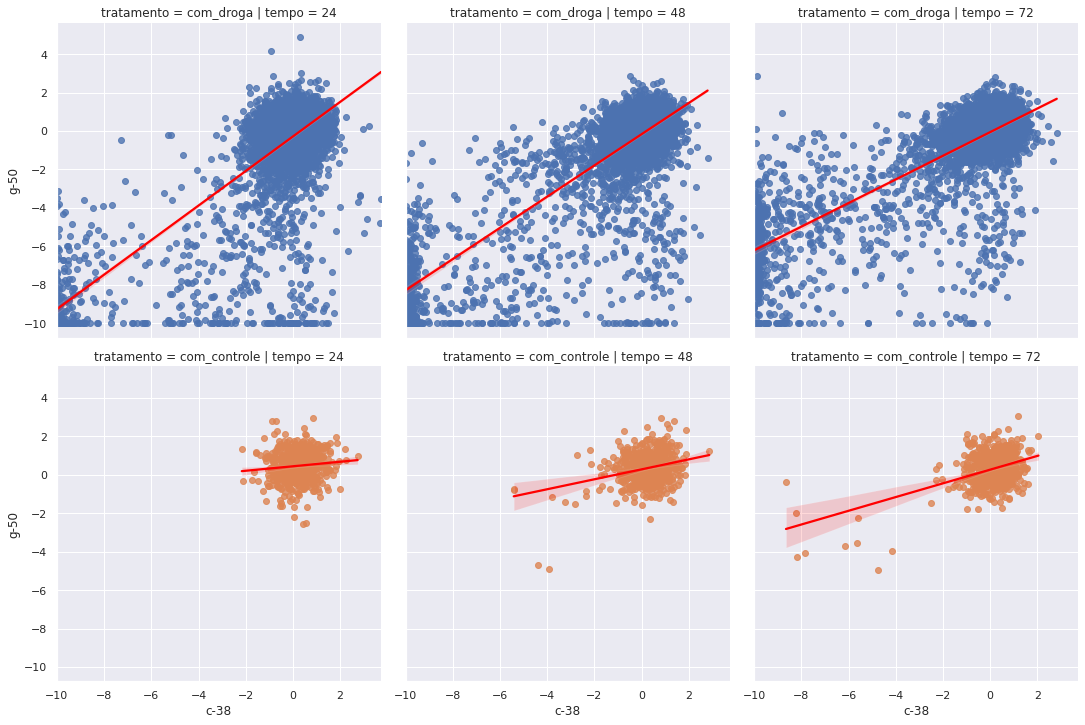

In [ ]:
sns.lmplot(data = dados, x = 'c-2', y = 'g-30', row = 'tratamento', col = 'tempo', hue = 'tratamento', line_kws = {'color': 'Red'})

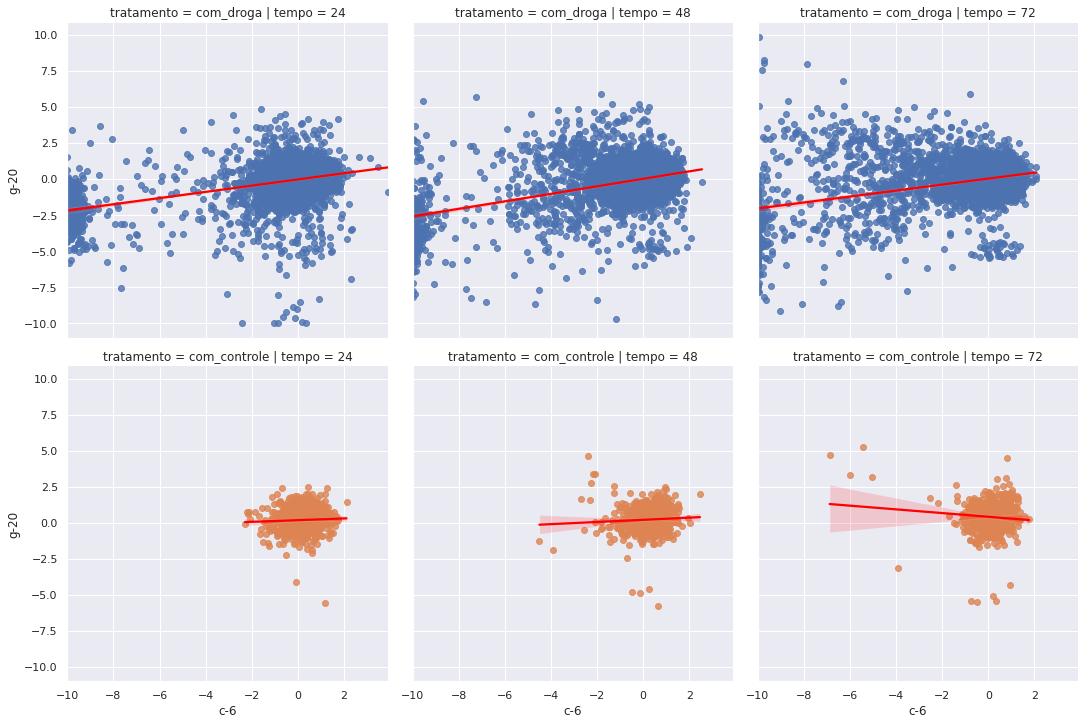

In [ ]:
sns.lmplot(data = dados, x = 'c-6', y = 'g-20', row = 'tratamento', col = 'tempo', hue = 'tratamento', line_kws = {'color': 'Red'})

###**Desafio 06:** Estudar o código que plota a matriz de correlação (heatmap)

In [ ]:
#Dados usados
#.corr() -> Compute the correlation matrix
corr = dados.loc[:,'g-0':'g-50'].corr()

# Generate a mask for the upper triangle
# If passed, data will not be shown in cells where mask is True. Cells with missing values are automatically masked.
# np.triu() -> Retorna uma matriz triangular superior.
# np.triu(np.ones_like(corr, dtype=bool)) -> Retorna uma matriz triangular superior igual a matriz correlação no formato booleano.
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap -> https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
# mask-= mask -> Passa a máscara para visualização de uma matriz triangular
# cmap -> The mapping from data values to color space. If not provided, the default will depend on whether center is set
# center -> The value at which to center the colormap when plotting divergant data. Using this parameter will change the default cmap if none is specified
# square -> If True, set the Axes aspect to “equal” so each cell will be square-shaped.
# linewidths -> Width of the lines that will divide each cell.
# cbar_kws={'shrink':.5} -> Keyword arguments for matplotlib.figure.Figure.colorbar().The shrink kwarg provides a simple way to scale the colorbar with respect to the axes.

###**Desafio 07:** Resumo do que você aprendeu com os dados.

*   Como usar heatmap
*   Como fazer matrizes de correlação usando "corr"
*   Como usar pandas.melt()
*   Normalização de tabelas em linhas e colunas

Apesar das cores do heatmap estarem com tons mais vibrantes para algumas correlações, não necessariamente podemos afirmar que existe uma certa influência sobre as amostras analisadas, apenas serve para que fiquemos atentos e se possível executar outras técnicas para obtenção de resultados mais precisos.



